In [34]:
import zipfile
import os

# Đường dẫn tới tệp zip vừa tải
zip_file_path = "archive.zip"

# Giải nén tệp zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Giải nén vào thư mục hiện tại
    zip_ref.extractall(os.getcwd())

print(f"Đã giải nén tệp tin {zip_file_path}.")


Đã giải nén tệp tin archive.zip.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("Online Retail.csv")
# Hiển thị dữ liệu 5 dòng dữ liệu đầu tiên
df.head()

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
0,536365,01-12-2010,08:26:00 AM,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,01-12-2010,08:26:00 AM,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,01-12-2010,08:26:00 AM,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,01-12-2010,08:26:00 AM,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,01-12-2010,08:26:00 AM,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom


Tổng Quan dữ liệu

In [94]:
print("Toàn bộ cột trong bảng dữ liệu")
for x in df.columns:
    print(x)
print('\n')
print('Số dòng của bộ dữ liệu: ',len(df))

Toàn bộ cột trong bảng dữ liệu
InvoiceNo
InvoiceDate
InvoiceTime
StockCode
Description
Quantity
UnitPrice
Totalsale
CustomerID
Country


Số dòng của bộ dữ liệu:  541909


DATA CLEANING 
Kiểm Tra Và Clean dữ liệu 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   InvoiceTime  541909 non-null  object 
 3   StockCode    541909 non-null  object 
 4   Description  540455 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Totalsale    541909 non-null  float64
 8   CustomerID   406829 non-null  float64
 9   Country      541909 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 41.3+ MB


In [ ]:
df.describe()


,Quantity,UnitPrice,Totalsale,CustomerID
count,541909.000000,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,17.987795,15287.690570
std,218.081158,96.759853,378.810824,1713.600303
min,-80995.000000,-11062.060000,-168469.600000,12346.000000
25%,1.000000,1.250000,3.400000,13953.000000
50%,3.000000,2.080000,9.750000,15152.000000
75%,10.000000,4.130000,17.400000,16791.000000
max,80995.000000,38970.000000,168469.600000,18287.000000


In [ ]:
df1 = df[df.CustomerID.isnull()]
print(df1.head())
print("Số giá trị bị thiếu ở cột CustomerID ", len(df1))

     InvoiceNo InvoiceDate  InvoiceTime StockCode  \
622     536414  01-12-2010  11:52:00 AM     22139   
1443    536544  01-12-2010  02:32:00 PM     21773   
1444    536544  01-12-2010  02:32:00 PM     21774   
1445    536544  01-12-2010  02:32:00 PM     21786   
1446    536544  01-12-2010  02:32:00 PM     21787   

                          Description  Quantity  UnitPrice  Totalsale  \
622                               NaN        56       0.00       0.00   
1443  DECORATIVE ROSE BATHROOM BOTTLE         1       2.51       2.51   
1444  DECORATIVE CATS BATHROOM BOTTLE         2       2.51       5.02   
1445               POLKADOT RAIN HAT          4       0.85       3.40   
1446            RAIN PONCHO RETROSPOT         2       1.66       3.32   

      CustomerID         Country  
622          NaN  United Kingdom  
1443         NaN  United Kingdom  
1444         NaN  United Kingdom  
1445         NaN  United Kingdom  
1446         NaN  United Kingdom  
Số giá trị bị thiếu ở cột Custom

In [97]:
# Ktra có bao nhiêu trường dữ liệu bị lặp lại
df.duplicated().sum()

np.int64(5268)

In [10]:
# 1.Loại bỏ những dòng trùng nhau
df.drop_duplicates(inplace=True)
# Đặt lại chỉ số
df.reset_index(drop=True,inplace=True)
# 2.Loại bỏ những hàng mà giá trị bị thiếu 
df.dropna(subset=['Description'],axis=0,inplace=True)
# 3.Làm cho tất cả các mục thấp hơn
df.Description = df.Description.apply(str.lower)
#xóa khoảng trắng ở đầu và cuối, đồng thời xóa dấu ".",không thể xóa các dấu câu khác vì chúng có thể là một phần của chính mục đó
df.Description = df.Description.apply(lambda x: x.replace(".", "").strip())
#4: Điền giá trị 0 vào những ô có giá trị NaN hoặc loại bỏ nó
df.CustomerID.fillna(0, inplace=True)
#df.dropna(subset=['CustomerID'], axis=0, inplace=True)
#5: Dặt giá trị tuyệt đối cho những cột sau
df.UnitPrice = df.UnitPrice.abs()
df.Quantity = df.Quantity.abs()
df.Totalsale = df.Totalsale.abs()


C:\Users\84974\AppData\Local\Temp\ipykernel_19580\2997788464.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.CustomerID.fillna(0, inplace=True)


In [11]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 536640
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    535187 non-null  object 
 1   InvoiceDate  535187 non-null  object 
 2   InvoiceTime  535187 non-null  object 
 3   StockCode    535187 non-null  object 
 4   Description  535187 non-null  object 
 5   Quantity     535187 non-null  int64  
 6   UnitPrice    535187 non-null  float64
 7   Totalsale    535187 non-null  float64
 8   CustomerID   535187 non-null  float64
 9   Country      535187 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 44.9+ MB


,Quantity,UnitPrice,Totalsale,CustomerID
count,535187.000000,535187.00000,535187.000000,535187.000000
mean,11.302279,4.72792,21.596591,11466.973804
std,218.980977,97.36083,380.993187,6778.037985
min,1.000000,0.00000,0.000000,0.000000
25%,1.000000,1.25000,3.900000,12348.000000
50%,3.000000,2.08000,9.900000,14360.000000
75%,11.000000,4.13000,17.700000,16242.000000
max,80995.000000,38970.00000,168469.600000,18287.000000


Chuẩn bị dữ liệu để trực quan hóa

In [13]:
#Đảm bảo tất cả ngày trên hóa đơn được định dạng theo format="%d-%m-%Y"
df.InvoiceDate = pd.to_datetime(df.InvoiceDate,format="%d-%m-%Y")

# Trích xuất và thêm 2 cột mới là Year và Month để tiện phân tích
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month

# Đồng thời tạo thêm cột mùa vào bảng
# seasons = [4,4,1,1,1,2,2,2,3,3,3,4]
seasons = ['Winter','Winter','Spring','Spring','Spring','Summer','Summer','Summer','Fall','Fall','Fall','Winter']

month_to_season = dict(zip(range(1,13),seasons))

# Thêm cột Season(Mùa)
df['Season'] = df.Month.map(month_to_season)

df[['InvoiceDate','Year','Month','Season']].sample(5)

,InvoiceDate,Year,Month,Season
232150,2011-06-20,2011,6,Summer
281160,2011-07-29,2011,7,Summer
432494,2011-11-03,2011,11,Fall
347556,2011-09-21,2011,9,Fall
61618,2011-01-18,2011,1,Winter


In [15]:
df.head(10)

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country,Year,Month,Season
0,536365,2010-12-01,08:26:00 AM,85123A,white hanging heart t-light holder,6,2.55,15.30,17850.0,United Kingdom,2010,12,Winter
1,536365,2010-12-01,08:26:00 AM,71053,white metal lantern,6,3.39,20.34,17850.0,United Kingdom,2010,12,Winter
2,536365,2010-12-01,08:26:00 AM,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850.0,United Kingdom,2010,12,Winter
3,536365,2010-12-01,08:26:00 AM,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850.0,United Kingdom,2010,12,Winter
4,536365,2010-12-01,08:26:00 AM,84029E,red woolly hottie white heart,6,3.39,20.34,17850.0,United Kingdom,2010,12,Winter
5,536365,2010-12-01,08:26:00 AM,22752,set 7 babushka nesting boxes,2,7.65,15.30,17850.0,United Kingdom,2010,12,Winter
6,536365,2010-12-01,08:26:00 AM,21730,glass star frosted t-light holder,6,4.25,25.50,17850.0,United Kingdom,2010,12,Winter
7,536366,2010-12-01,08:28:00 AM,22633,hand warmer union jack,6,1.85,11.10,17850.0,United Kingdom,2010,12,Winter
8,536366,2010-12-01,08:28:00 AM,22632,hand warmer red polka dot,6,1.85,11.10,17850.0,United Kingdom,2010,12,Winter
9,536367,2010-12-01,08:34:00 AM,84879,assorted colour bird ornament,32,1.69,54.08,13047.0,United Kingdom,2010,12,Winter


In [16]:
def extract_am_pm(time):
    """
    Hàm này lấy thời gian dưới dạng chuỗi và trích xuất 
    nếu đó là AM hoặc PM

    thời gian dưới dạng chuỗi return: AM hoặc PM
    """
    # lấy phần thứ hai của thời gian chuỗi 
    am_pm = time.split()[1] 
    # returning the value
    return am_pm


In [17]:
# Thêm cột là sáng hoặc tối
df['AM_or_PM'] = df.InvoiceTime.apply(extract_am_pm)

In [18]:
df.head(10)

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country,Year,Month,Season,AM_or_PM
0,536365,2010-12-01,08:26:00 AM,85123A,white hanging heart t-light holder,6,2.55,15.30,17850.0,United Kingdom,2010,12,Winter,AM
1,536365,2010-12-01,08:26:00 AM,71053,white metal lantern,6,3.39,20.34,17850.0,United Kingdom,2010,12,Winter,AM
2,536365,2010-12-01,08:26:00 AM,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850.0,United Kingdom,2010,12,Winter,AM
3,536365,2010-12-01,08:26:00 AM,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850.0,United Kingdom,2010,12,Winter,AM
4,536365,2010-12-01,08:26:00 AM,84029E,red woolly hottie white heart,6,3.39,20.34,17850.0,United Kingdom,2010,12,Winter,AM
5,536365,2010-12-01,08:26:00 AM,22752,set 7 babushka nesting boxes,2,7.65,15.30,17850.0,United Kingdom,2010,12,Winter,AM
6,536365,2010-12-01,08:26:00 AM,21730,glass star frosted t-light holder,6,4.25,25.50,17850.0,United Kingdom,2010,12,Winter,AM
7,536366,2010-12-01,08:28:00 AM,22633,hand warmer union jack,6,1.85,11.10,17850.0,United Kingdom,2010,12,Winter,AM
8,536366,2010-12-01,08:28:00 AM,22632,hand warmer red polka dot,6,1.85,11.10,17850.0,United Kingdom,2010,12,Winter,AM
9,536367,2010-12-01,08:34:00 AM,84879,assorted colour bird ornament,32,1.69,54.08,13047.0,United Kingdom,2010,12,Winter,AM


In [45]:
df[['InvoiceTime', 'AM_or_PM']].sample(5)

,InvoiceTime,AM_or_PM
488021,10:55:00 AM,AM
204483,12:26:00 PM,PM
20135,01:34:00 PM,PM
51833,10:40:00 AM,AM
43842,12:15:00 PM,PM


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 536640
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   InvoiceDate  535187 non-null  datetime64[ns]
 2   InvoiceTime  535187 non-null  object        
 3   StockCode    535187 non-null  object        
 4   Description  535187 non-null  object        
 5   Quantity     535187 non-null  int64         
 6   UnitPrice    535187 non-null  float64       
 7   Totalsale    535187 non-null  float64       
 8   CustomerID   535187 non-null  float64       
 9   Country      535187 non-null  object        
 10  Year         535187 non-null  int32         
 11  Month        535187 non-null  int32         
 12  Season       535187 non-null  object        
 13  AM_or_PM     535187 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(7)
memory usage: 57.2+ MB


PHÂN TÍCH KHAI THÁC DỮ LIỆU 

array([[<Axes: title={'center': 'InvoiceDate'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'Totalsale'}>,
        <Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Month'}>, <Axes: >, <Axes: >]],
      dtype=object)

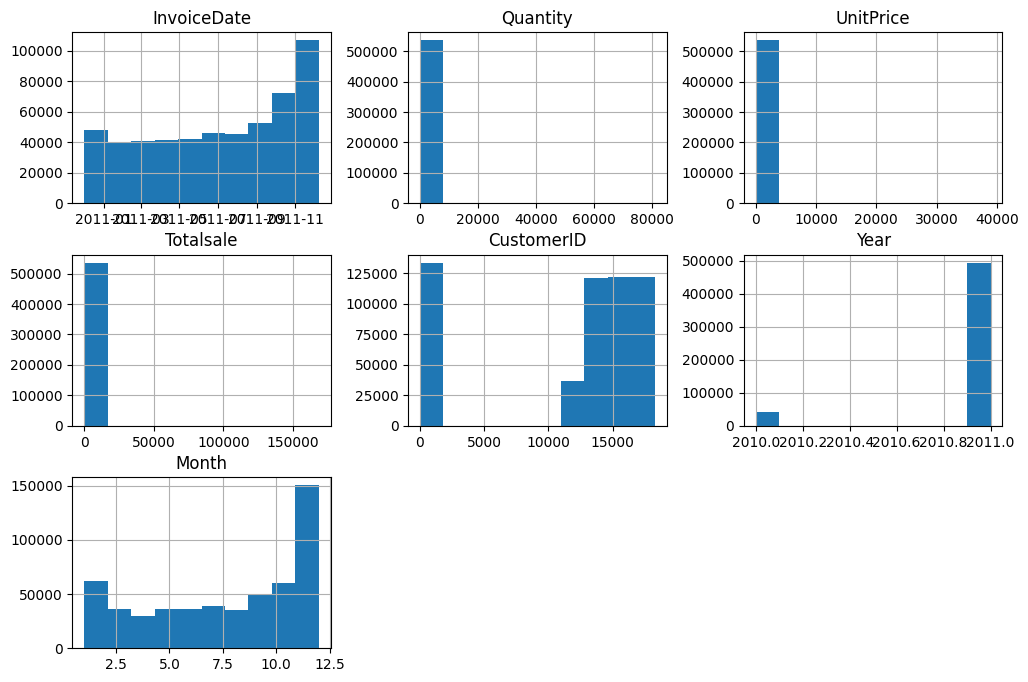

In [19]:
df.hist(figsize=(12,8))

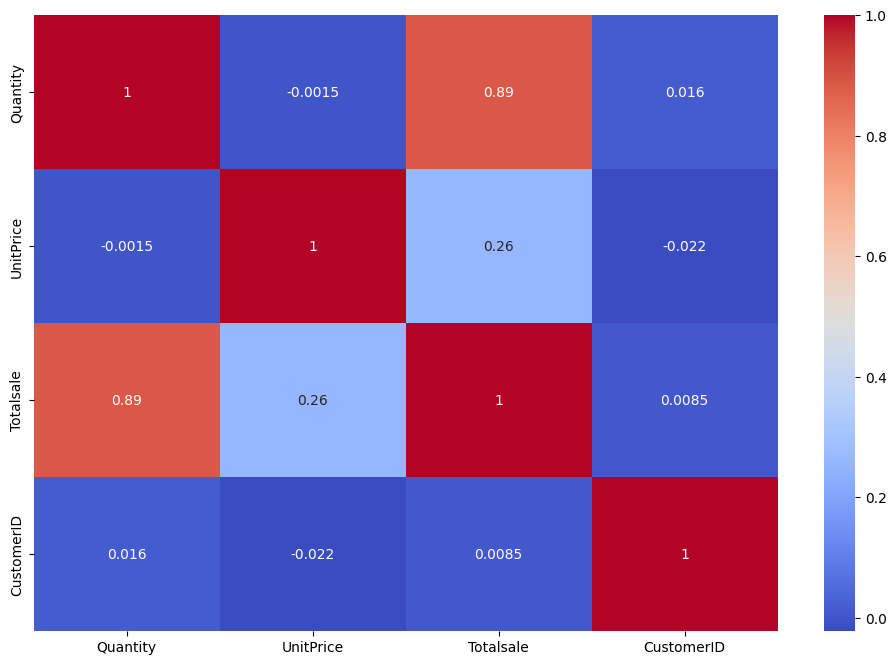

In [20]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Vẽ heatmap ma trận tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

plt.show()

In [21]:
def number_of_unique(dataframe):
    for col in dataframe.columns:
        print("Cột {} có {} số giá trị độc lập.".format(col, dataframe[col].nunique()))

In [22]:
number_of_unique(df)

Cột InvoiceNo có 24446 số giá trị độc lập.
Cột InvoiceDate có 305 số giá trị độc lập.
Cột InvoiceTime có 774 số giá trị độc lập.
Cột StockCode có 3958 số giá trị độc lập.
Cột Description có 4191 số giá trị độc lập.
Cột Quantity có 457 số giá trị độc lập.
Cột UnitPrice có 1629 số giá trị độc lập.
Cột Totalsale có 4914 số giá trị độc lập.
Cột CustomerID có 4373 số giá trị độc lập.
Cột Country có 38 số giá trị độc lập.
Cột Year có 2 số giá trị độc lập.
Cột Month có 12 số giá trị độc lập.
Cột Season có 4 số giá trị độc lập.
Cột AM_or_PM có 2 số giá trị độc lập.


In [23]:
def barplot_percentage(column, title=" ", slice=12 ,palette="Set2"):
    # Số dòng
    total = df.shape[0]

    f, ax = plt.subplots(figsize=(14, 8))

    # Sử dụng đối số từ khóa x và y
    ax = sns.barplot(x=df[column].value_counts()[:slice].index, 
                     y=df[column].value_counts()[:slice].values,palette=palette)

    ax.set_title(title)

    # Thêm tỷ lệ phần trăm 
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{percentage}', (x + width / 2, y + height * 1.02), ha='center')

    plt.ylabel("Count")
    plt.show()


C:\Users\84974\AppData\Local\Temp\ipykernel_19580\268306914.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[column].value_counts()[:slice].index,


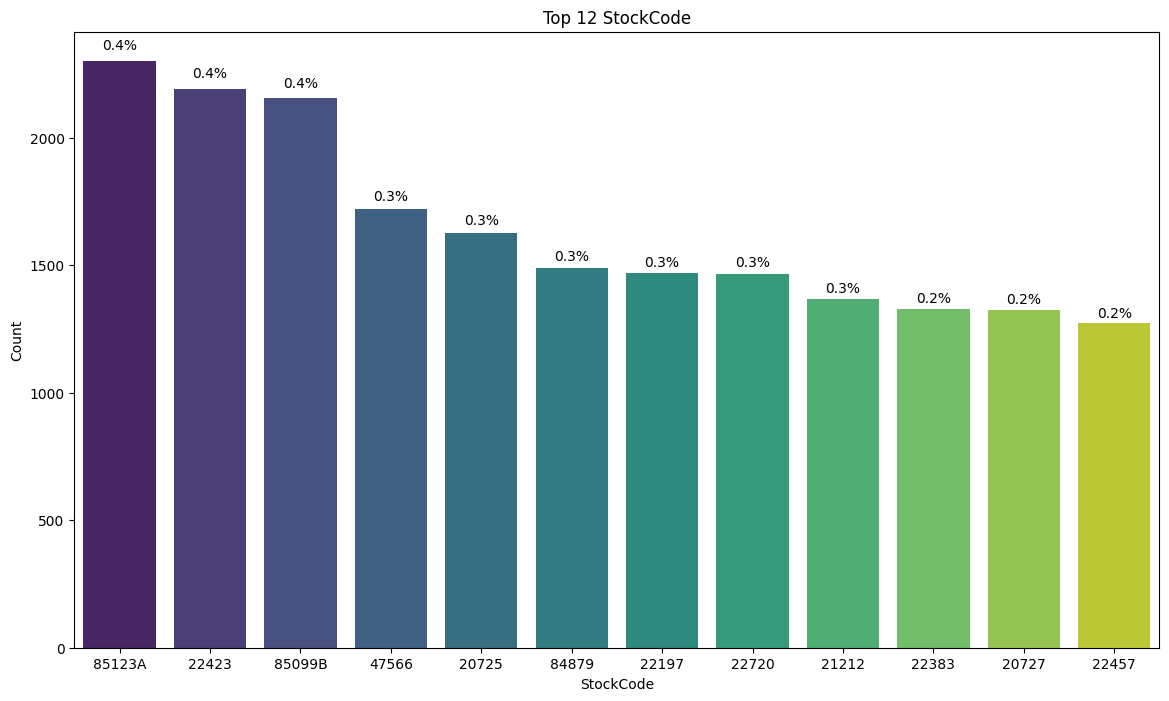

In [24]:
# Gọi hàm để vẽ biểu đồ
barplot_percentage("StockCode", "Top 12 StockCode",palette="viridis")

C:\Users\84974\AppData\Local\Temp\ipykernel_19580\268306914.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[column].value_counts()[:slice].index,


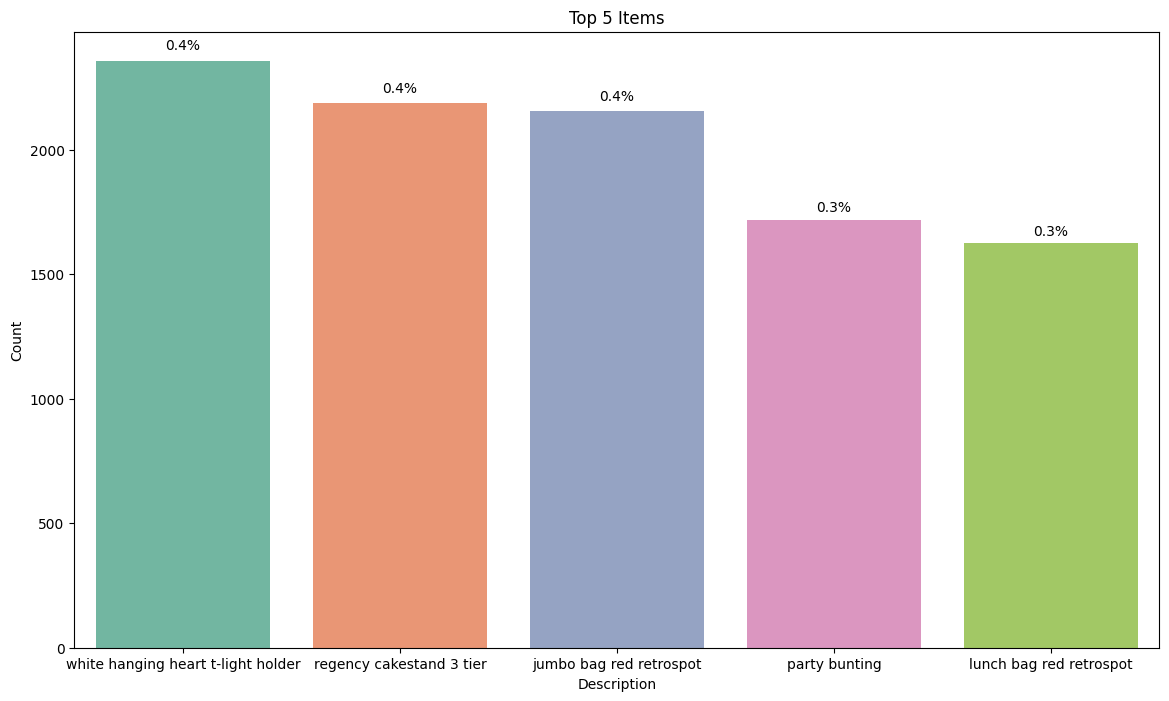

In [25]:
#Biểu đồ Top 5 sản phẩm được bán chạy nhất
barplot_percentage("Description", "Top 5 Items", 5)

C:\Users\84974\AppData\Local\Temp\ipykernel_19580\268306914.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[column].value_counts()[:slice].index,


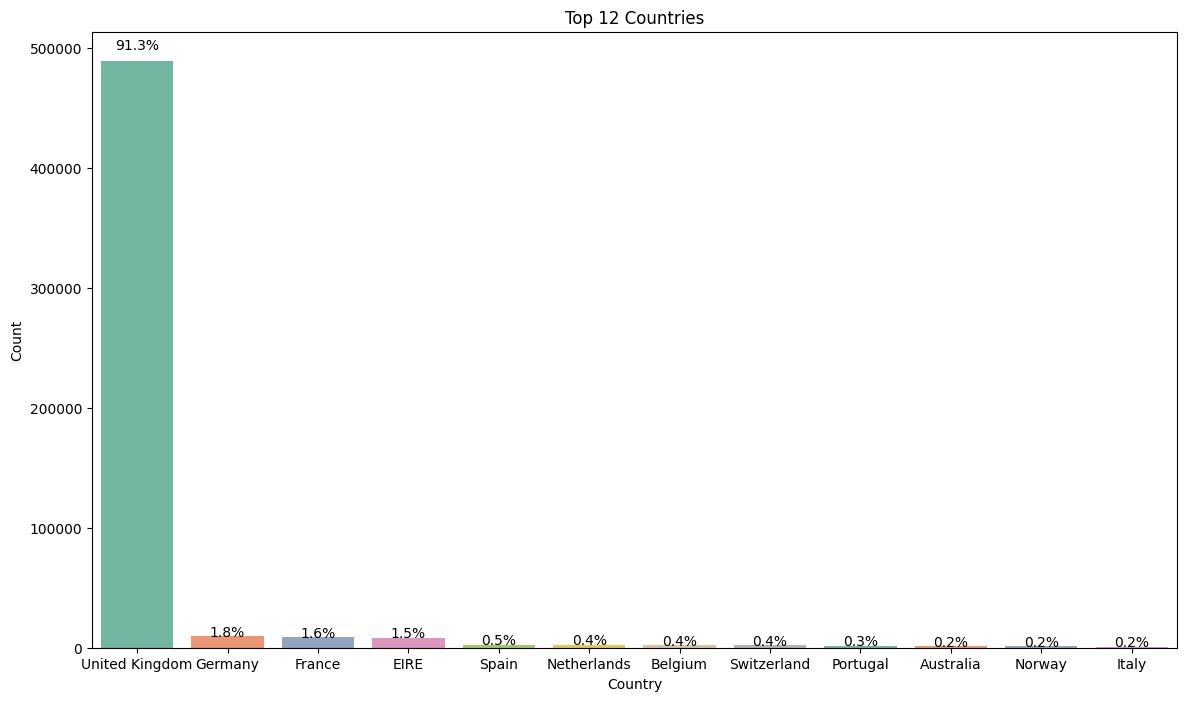

In [26]:
# Biểu đồ lượng mua sản phẩm trong top 12 quốc gia
barplot_percentage("Country", "Top 12 Countries")

C:\Users\84974\AppData\Local\Temp\ipykernel_19580\268306914.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[column].value_counts()[:slice].index,


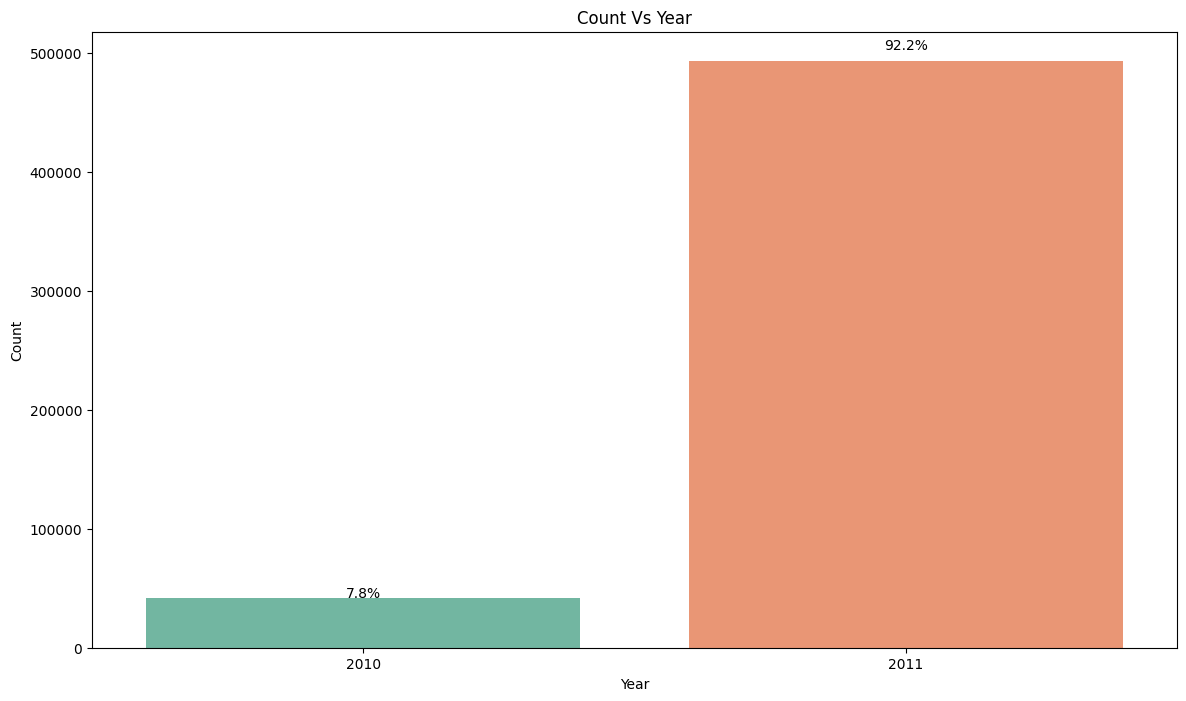

In [28]:
# Biểu đồ so sánh lượng bán giữa 2 năm 2010 và 2011
barplot_percentage("Year", "Count Vs Year")

C:\Users\84974\AppData\Local\Temp\ipykernel_18452\3894232386.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[column].value_counts()[:slice].index,


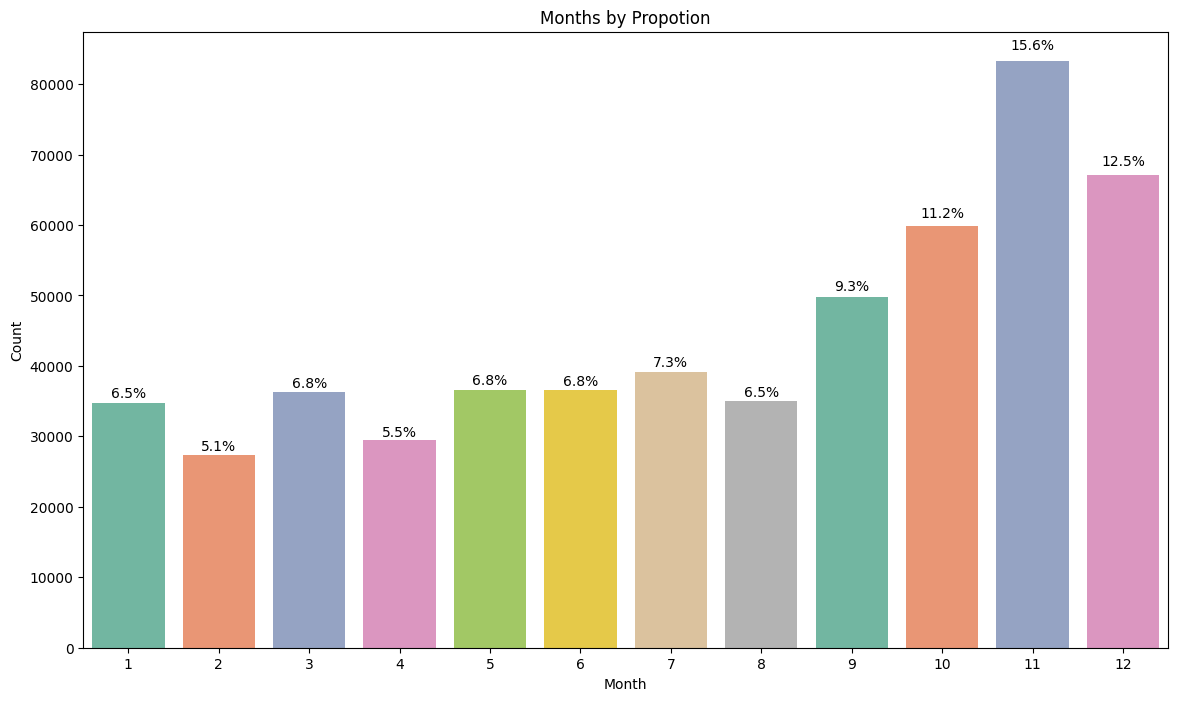

In [87]:
# Biểu đồ lượng bán theo từng tháng
barplot_percentage("Month", "Months by Propotion")

C:\Users\84974\AppData\Local\Temp\ipykernel_18452\3894232386.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[column].value_counts()[:slice].index,


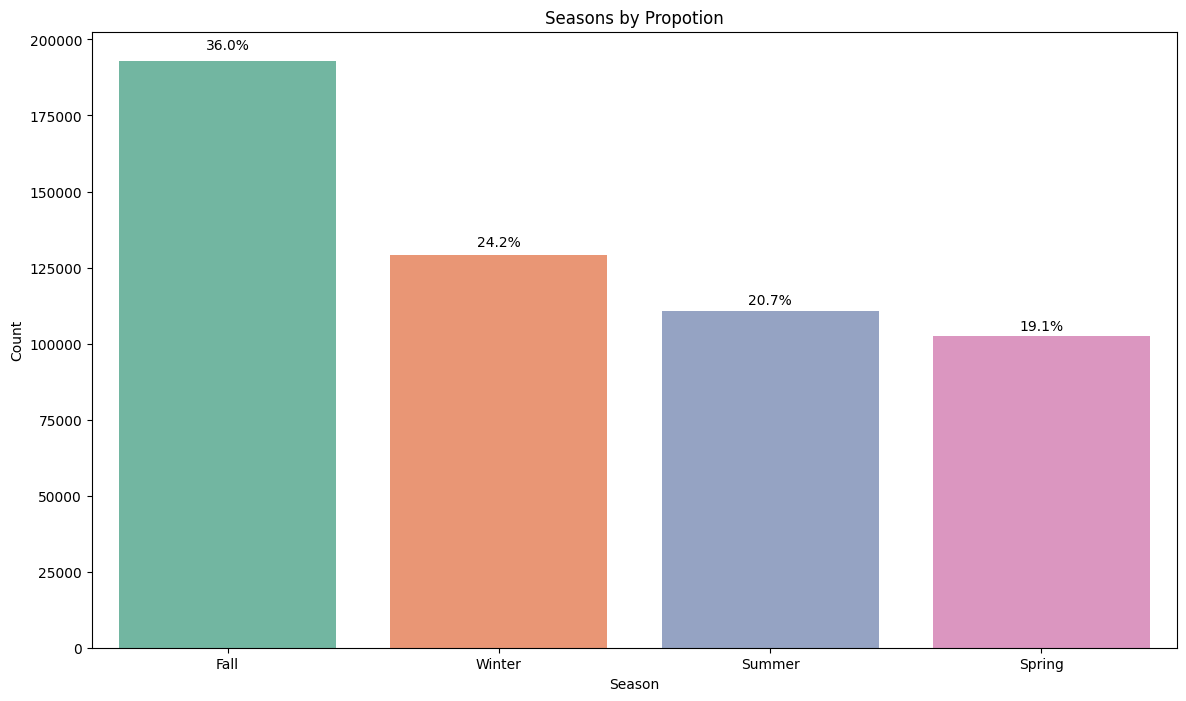

In [88]:
# Biểu đồ lượng bán theo mùa
barplot_percentage("Season", "Seasons by Propotion")

C:\Users\84974\AppData\Local\Temp\ipykernel_18452\3894232386.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df[column].value_counts()[:slice].index,


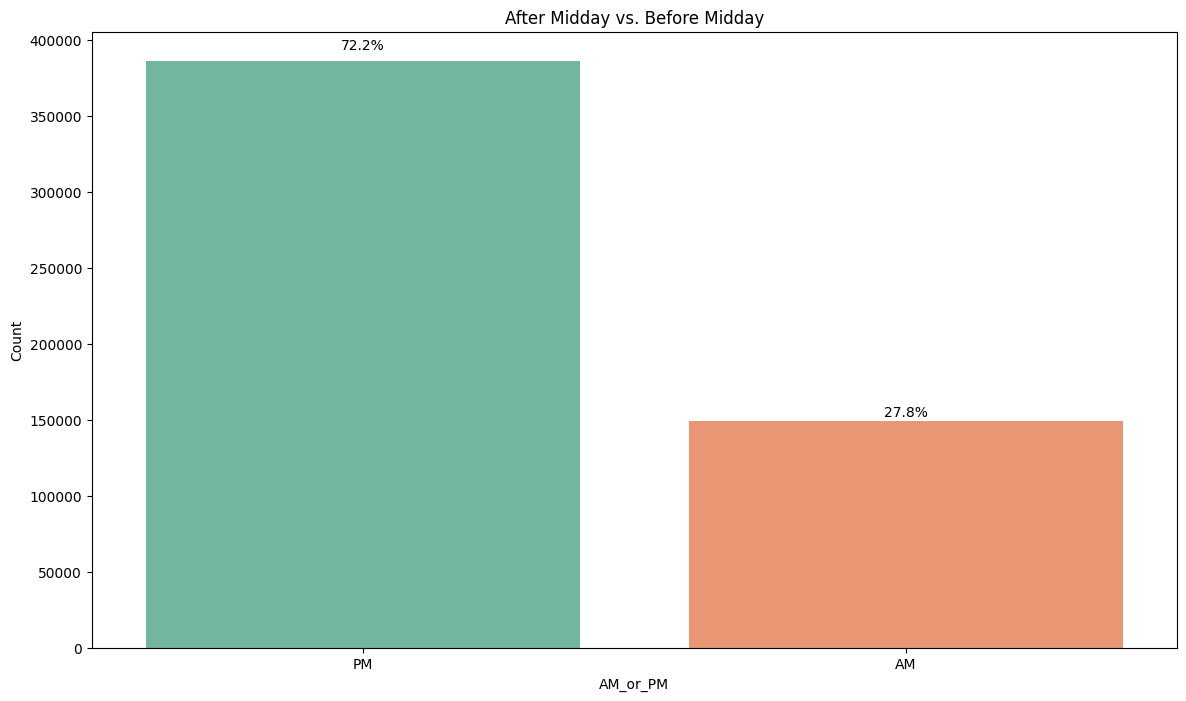

In [89]:
# Biểu đồ lượng bán phân theo buổi trong ngày 
barplot_percentage("AM_or_PM", "After Midday vs. Before Midday")